<a href="https://colab.research.google.com/github/jhan-04/practice_learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#linear regression
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files #파일 컴퓨터내에서 불러오기
myfile = files.upload()


Saving LinearRegressionData.csv to LinearRegressionData (1).csv


In [ ]:
#io와 pandas 모듈 import
import io #이후 주피터 노트북과는 다르게 pandas 모듈 외 io 모듈을 import 합니다(io 모듈 없이 pandas 모듈만 import할 경우, 오류 발생).
import pandas as pd
#pd.read_csv로 csv파일 불러오기
dataset = pd.read_csv(io.BytesIO(myfile['LinearRegressionData.csv'])) #파일명 입력
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [ ]:
x=dataset.iloc[:,:-1].values # 독립변수, 모든 row들고오기, 맨마지막 col빼고 들고오기
y=dataset.iloc[:,-1].values # 종속변수

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression() #객체생성
reg.fit(x,y) #학습 모델 생성

LinearRegression()

In [ ]:
y_pred=reg.predict(x)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

Text(0, 0.5, 'Score')

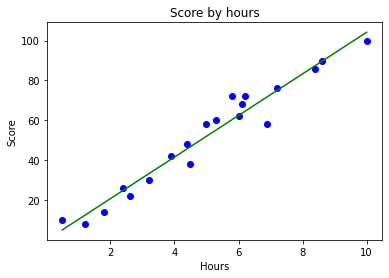

In [ ]:
plt.scatter(x,y,color='b') #산점도
plt.plot(x,y_pred, color='g') #학습된 선
plt.title('Score by hours') 
plt.xlabel('Hours')
plt.ylabel('Score')

In [ ]:
print('9,8,7시간 공부 했을 때 예상 점수',reg.predict([[9],[8],[7]])) #입력형태를 맞춰서 넣어줘야 예상값 알 수 있다. 

9,8,7시간 공부 했을 때 예상 점수 [93.77478776 83.33109082 72.88739388]


In [ ]:
reg.coef_ #기울기 a, coeficient

array([10.44369694])

In [ ]:
reg.intercept_ #y 절편 b, y=a*x+b